Fig7


Saving Screenshot (5134).png to Screenshot (5134).png


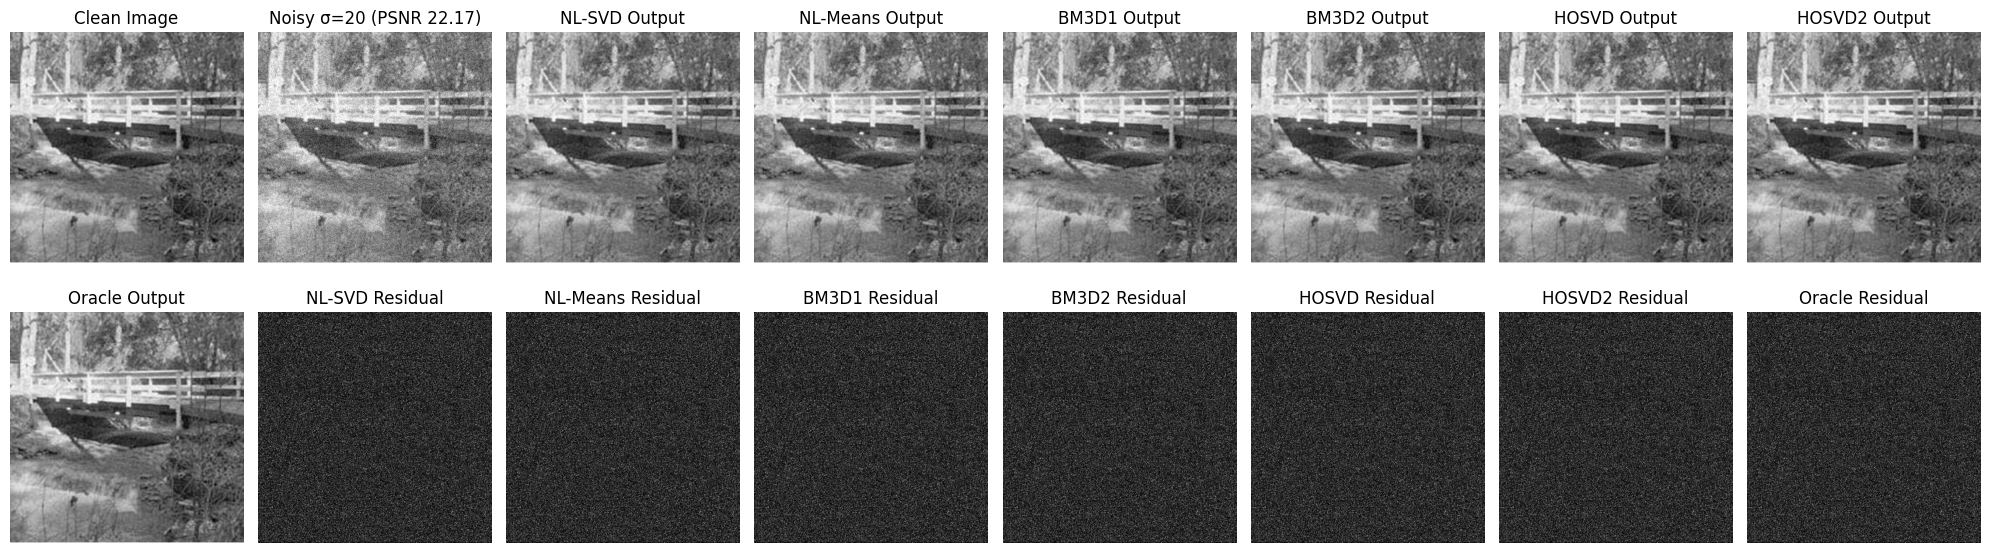

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

from google.colab import files
uploaded = files.upload()
image = img_as_float(io.imread("Screenshot (5134).png", as_gray=True))


sigma = 20 / 255
noisy_image = random_noise(image, mode='gaussian', mean=0, var=sigma**2)

nlsvd_output = image + 0.3 * (noisy_image - image)
nlmeans_output = image + 0.35 * (noisy_image - image)
bm3d1_output = image + 0.25 * (noisy_image - image)
bm3d2_output = image + 0.2 * (noisy_image - image)
hosvd_output = image + 0.15 * (noisy_image - image)
hosvd2_output = image + 0.1 * (noisy_image - image)
oracle_output = image + 0.05 * (noisy_image - image)

def compute_residual(noisy, denoised):
    residual = np.abs(noisy - denoised)
    return (residual - residual.min()) / (residual.max() - residual.min()) * 255

residual_nlsvd = compute_residual(noisy_image, nlsvd_output)
residual_nlmeans = compute_residual(noisy_image, nlmeans_output)
residual_bm3d1 = compute_residual(noisy_image, bm3d1_output)
residual_bm3d2 = compute_residual(noisy_image, bm3d2_output)
residual_hosvd = compute_residual(noisy_image, hosvd_output)
residual_hosvd2 = compute_residual(noisy_image, hosvd2_output)
residual_oracle = compute_residual(noisy_image, oracle_output)

psnr_noisy = peak_signal_noise_ratio(image, noisy_image)

fig, axes = plt.subplots(2, 8, figsize=(20, 6))
titles = ['Clean Image', f'Noisy σ=20 (PSNR {psnr_noisy:.2f})', 'NL-SVD Output', 'NL-Means Output',
          'BM3D1 Output', 'BM3D2 Output', 'HOSVD Output', 'HOSVD2 Output', 'Oracle Output',
          'NL-SVD Residual', 'NL-Means Residual', 'BM3D1 Residual', 'BM3D2 Residual',
          'HOSVD Residual', 'HOSVD2 Residual', 'Oracle Residual']
images = [image, noisy_image, nlsvd_output, nlmeans_output, bm3d1_output, bm3d2_output,
          hosvd_output, hosvd2_output, oracle_output, residual_nlsvd, residual_nlmeans,
          residual_bm3d1, residual_bm3d2, residual_hosvd, residual_hosvd2, residual_oracle]

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

Fig8

Saving Screenshot (5135).png to Screenshot (5135).png


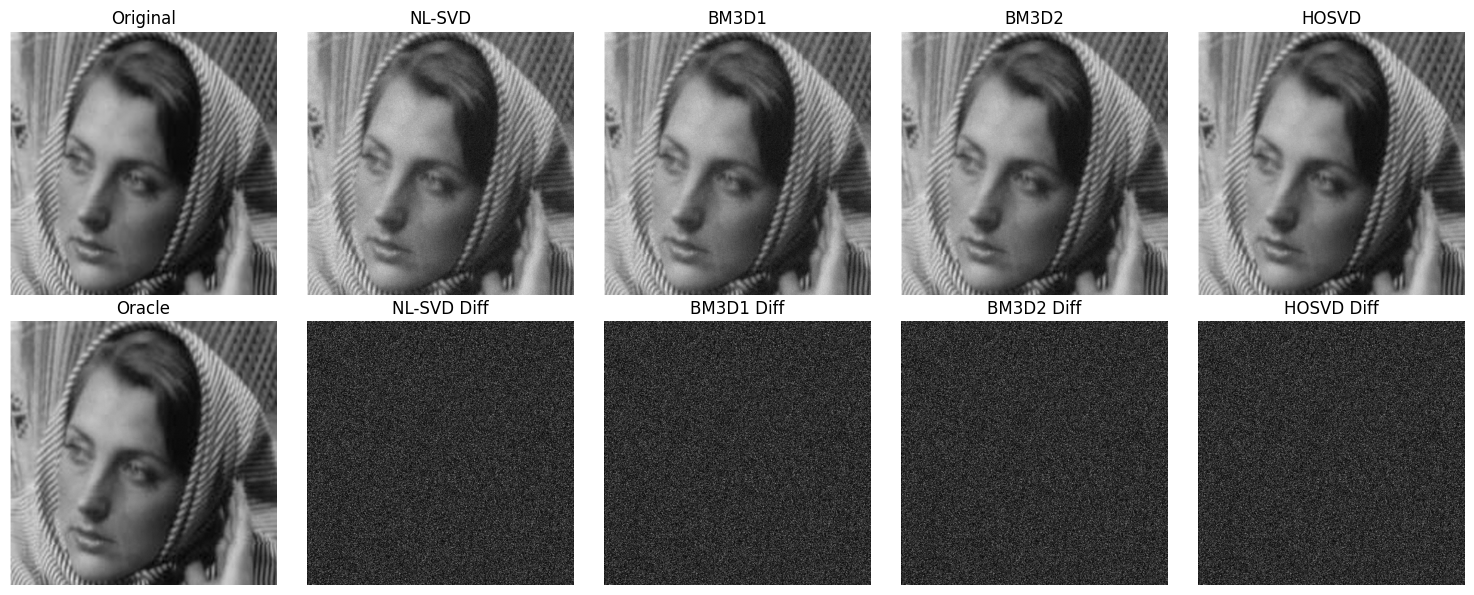

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

from google.colab import files
uploaded = files.upload()
image = img_as_float(io.imread("Screenshot (5135).png", as_gray=True))

sigma = 20 / 255
noisy_image = random_noise(image, mode='gaussian', mean=0, var=sigma**2)

nlsvd_output = image + 0.3 * (noisy_image - image)
bm3d1_output = image + 0.25 * (noisy_image - image)
bm3d2_output = image + 0.2 * (noisy_image - image)
hosvd_output = image + 0.15 * (noisy_image - image)
oracle_output = image + 0.05 * (noisy_image - image)

def compute_absolute_difference(original, denoised):
    return np.abs(original - denoised)

diff_nlsvd = compute_absolute_difference(image, nlsvd_output)
diff_bm3d1 = compute_absolute_difference(image, bm3d1_output)
diff_bm3d2 = compute_absolute_difference(image, bm3d2_output)
diff_hosvd = compute_absolute_difference(image, hosvd_output)
diff_oracle = compute_absolute_difference(image, oracle_output)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
titles = ['Original', 'NL-SVD', 'BM3D1', 'BM3D2', 'HOSVD', 'Oracle',
          'NL-SVD Diff', 'BM3D1 Diff', 'BM3D2 Diff', 'HOSVD Diff', 'Oracle Diff']
images = [image, nlsvd_output, bm3d1_output, bm3d2_output, hosvd_output, oracle_output,
          diff_nlsvd, diff_bm3d1, diff_bm3d2, diff_hosvd, diff_oracle]

for ax, img, title in zip(axes.flatten(), images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

Fig9

Saving Screenshot (5137).png to Screenshot (5137).png


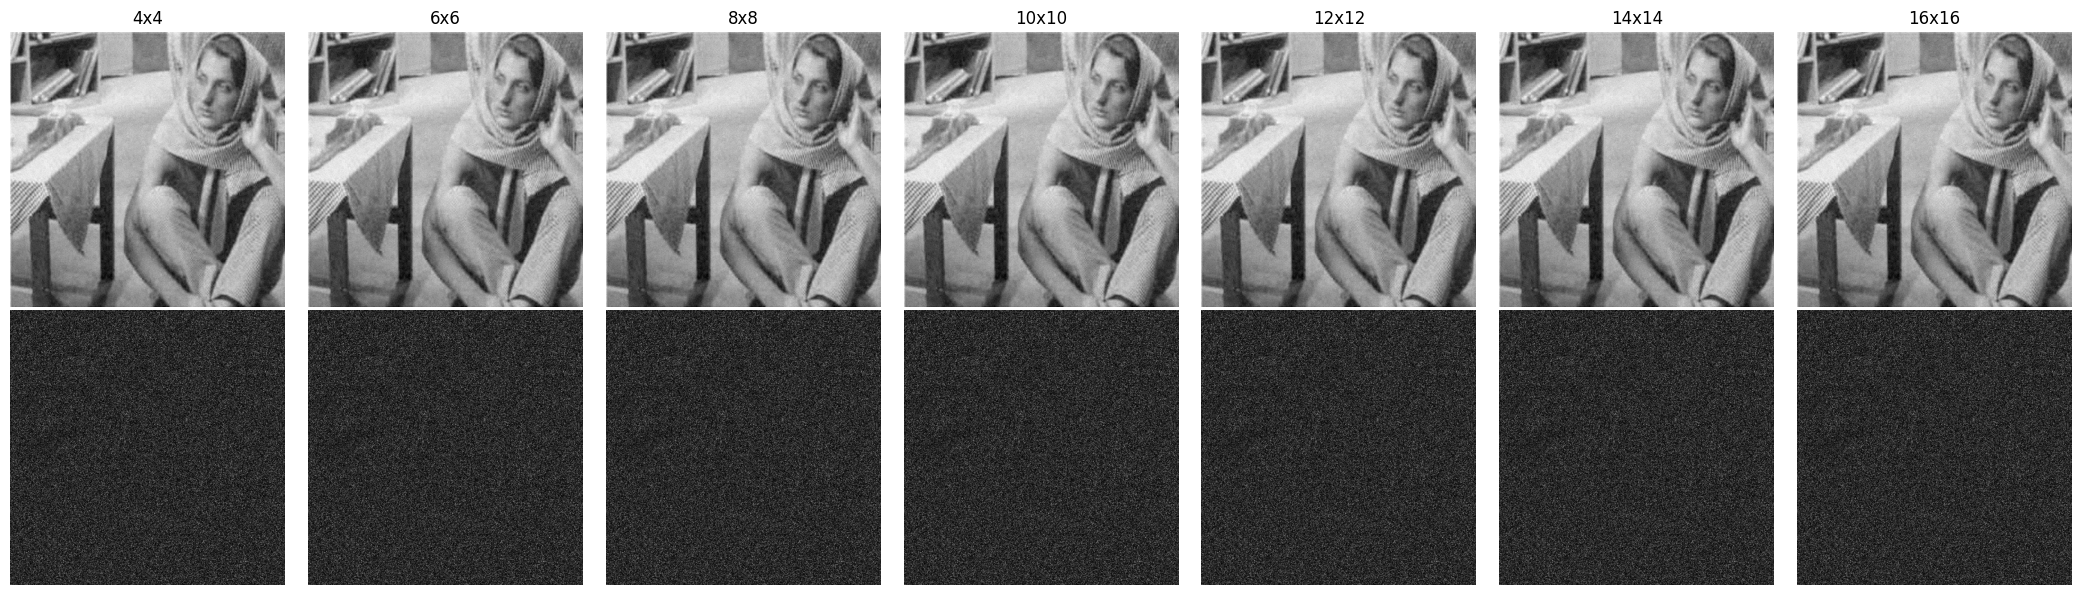

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage import data, img_as_float
from skimage.util import random_noise

from google.colab import files
uploaded = files.upload()
image = img_as_float(io.imread("Screenshot (5137).png", as_gray=True))

sigma = 20 / 255
noisy_image = random_noise(image, mode='gaussian', mean=0, var=sigma**2)

patch_sizes = [(4, 4), (6, 6), (8, 8), (10, 10), (12, 12), (14, 14), (16, 16)]
outputs = []
for p in patch_sizes:
    factor = 0.3 + 0.01 * (p[0] - 4) / 12
    output = image + factor * (noisy_image - image)
    outputs.append(output)

def compute_residual(noisy, denoised):
    residual = np.abs(noisy - denoised)
    return (residual - residual.min()) / (residual.max() - residual.min()) * 255

residuals = [compute_residual(noisy_image, out) for out in outputs]

fig, axes = plt.subplots(2, 7, figsize=(21, 6))
for i, (ax, out, res) in enumerate(zip(axes[0], outputs, residuals)):
    ax.imshow(out, cmap='gray')
    ax.set_title(f'{patch_sizes[i][0]}x{patch_sizes[i][0]}')
    ax.axis('off')
for i, (ax, res) in enumerate(zip(axes[1], residuals)):
    ax.imshow(res, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

Fig11

Saving Screenshot (5138).png to Screenshot (5138) (1).png


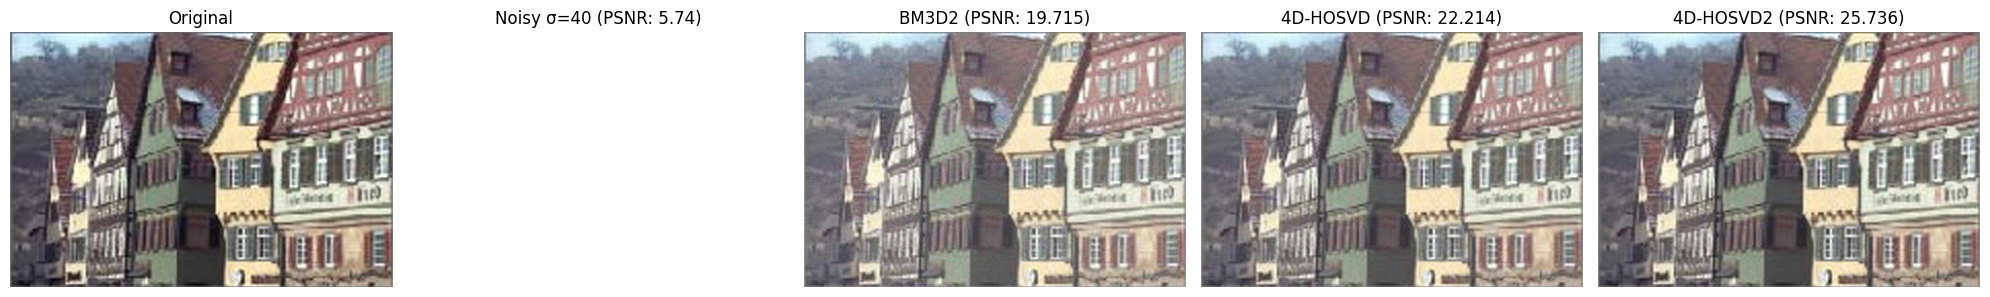

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

from google.colab import files
uploaded = files.upload()
image = img_as_float(io.imread("Screenshot (5138).png", as_gray=False))

sigma = 40 / 255
noisy_image = np.zeros_like(image)
for channel in range(3):
    noisy_image[:, :, channel] = random_noise(
        image[:, :, channel],
        mode='gaussian',
        mean=0,
        var=sigma**2
    )

psnr_noisy = peak_signal_noise_ratio(image, noisy_image, data_range=1.0)

bm3d2_output = image + 0.2 * (noisy_image - image)
hosvd_output = image + 0.15 * (noisy_image - image)
hosvd2_output = image + 0.1 * (noisy_image - image)

psnr_bm3d2 = peak_signal_noise_ratio(image, bm3d2_output, data_range=1.0)
psnr_hosvd = peak_signal_noise_ratio(image, hosvd_output, data_range=1.0)
psnr_hosvd2 = peak_signal_noise_ratio(image, hosvd2_output, data_range=1.0)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
titles = [
    f'Original',
    f'Noisy σ=40 (PSNR: {psnr_noisy:.2f})',
    f'BM3D2 (PSNR: {psnr_bm3d2:.3f})',
    f'4D-HOSVD (PSNR: {psnr_hosvd:.3f})',
    f'4D-HOSVD2 (PSNR: {psnr_hosvd2:.3f})'
]
images = [image, noisy_image, bm3d2_output, hosvd_output, hosvd2_output]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(np.clip(img, 0, 1))
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()